# RESULTS 

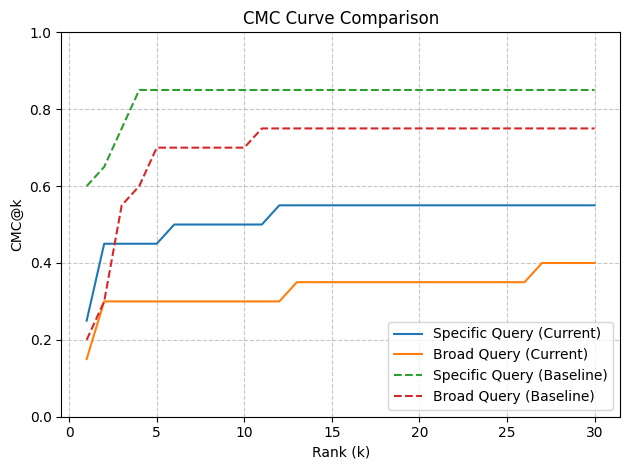

In [2]:
import numpy as np
import matplotlib.pyplot as plt

specific_ranks = [
    np.inf, 12, 1, np.inf, 1, 6, 2, 2, 1, np.inf, 1, np.inf, 2, 
    np.inf, np.inf, 1, np.inf, np.inf, np.inf, 2
    ]
broad_ranks = [
    np.inf, np.inf, 2, np.inf, 1, 27, 13, 1, np.inf, np.inf, 
    np.inf, np.inf, np.inf, np.inf, 2, 2, np.inf, np.inf, np.inf, 1
    ]


specific_ranks_baseline= [
    np.inf, 3, 3, np.inf, 1, 1, 1, 1, 1, 1,
    4, 2, 1, np.inf, 4, 1, 1, 1, 1, 1
]
broad_ranks_baseline = [
    np.inf, 3, 1, 5, 3, 2, 5, 3, 1, np.inf,
    1, 3, 4, np.inf, np.inf, 3, 2, np.inf, 1, 11
]


# To use with other data, save as .npy or csv and load accordingly

def compute_cmc(ranks, max_rank=30):
    cmc = np.zeros(max_rank)
    for k in range(1, max_rank + 1):
        cmc[k - 1] = np.sum(np.array(ranks) <= k) / len(ranks)
    return cmc

cmc_specific = compute_cmc(specific_ranks)
cmc_broad = compute_cmc(broad_ranks)
cmc_specific_baseline = compute_cmc(specific_ranks_baseline)
cmc_broad_baseline = compute_cmc(broad_ranks_baseline)

plt.plot(range(1, 31), cmc_specific, label='Specific Query (Current)')
plt.plot(range(1, 31), cmc_broad, label='Broad Query (Current)')
plt.plot(range(1, 31), cmc_specific_baseline, linestyle='--', label='Specific Query (Baseline)')
plt.plot(range(1, 31), cmc_broad_baseline, linestyle='--', label='Broad Query (Baseline)')

plt.xlabel('Rank (k)')
plt.ylabel('CMC@k')
plt.title('CMC Curve Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()